In [1]:
import sys
import os

# Get the current directory
current_directory = os.getcwd()

# Add the current directory to the Python path
sys.path.append(current_directory)
print(current_directory)

from spectraltools import *
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import os
import math
import re
import scipy
#import tensorflow as tf
import seaborn as sns

import metrics
import spectraltools
import importlib
# clear the import cache
importlib.reload(metrics)
importlib.reload(spectraltools)
# now you can import my_class and it'll be updated
from metrics import *
from spectraltools import *

C:\Users\esteb\cicima\escarabajos\gamma


In [2]:
"""This section allows the user to choose their workplace location.
This is important if the user has multiple locations and operating systems in which this 
script is run"""

#select location
working_at = "wfh"

#Training data is used when we are already certain of species and genera for a particular sample
training_data_is_used = False

if working_at == "colaboratory":
  from google.colab import drive
  drive.mount("/content/drive")
  #base folder
  """Select the location for your base folder"""
    
  base_folder = r"/content/drive/My Drive/CICIMA/escarabajos_files"
  
elif working_at == "wfh":

    """Select the location of your base folder"""
    base_folder = r"C:\Users\esteb\cicima\escarabajos"

elif working_at == "cicima_desktop":
  
    """Select the location of your base folder"""
    base_folder = r"C:\Users\EstebanSoto\Jupyter\escarabajos"

elif working_at == "cicima_laptop":
    
    """Select the location of your base folder"""
    base_folder = r"/home/vinicio/escarabajos"

#define the location of the tables with information about the collections and its parent directory

collection_tables_main_path =  os.path.join(base_folder, "L1050_data","collections")
collection_files_main_path = os.path.join(base_folder, "L1050_data")

# Define report location
report_location = os.path.join(base_folder, "reports","data_analysis")

#collection_descriptor = r"CICIMAUCR and ANGSOL" tododelete

#File location and metadata location for collection 1
angsol_collection_path = os.path.join(collection_files_main_path,"ANGSOL","average") 
angsol_collection_metadata = os.path.join(collection_tables_main_path,"CICIMA-beetles-general-inventory - ANGSOL.txt") 

#File location and metadata location for collection 2
cicimaucr_collection_path = os.path.join(collection_files_main_path,r"TRA_data_CICIMA_INBUCR","CICIMAUCR","reflectance")  #listo
cicimaucr_collection_2_path = os.path.join(collection_files_main_path,r"CICIMA-2024-01-REFLECTANCE","average")
cicimaucr_collection_3_path = os.path.join(collection_files_main_path,r"CICIMA-2024-03-REFLECTANCE","without iris nor lens","average")
cicimaucr_collection_4_path = os.path.join(collection_files_main_path,r"CICIMA-2024-05-REFLECTANCE","average")
cicima_ucr_metadata = os.path.join(collection_tables_main_path,r"CICIMA-beetles-general-inventory - CICIMAUCR.txt") 

#File location and metadata location for collection 3
inbucr_collection_path = os.path.join(collection_files_main_path,r"INBUCR","average") #listo
inbucr_metadata = os.path.join(collection_tables_main_path,r"CICIMA-beetles-general-inventory - INBUCR.txt") 

#File location and metadata location for collection 4
bioucr_collection_path = os.path.join(collection_files_main_path,r"BIOUCR","average")  #listo
bioucr_metadata = os.path.join(collection_tables_main_path,r"CICIMA-beetles-general-inventory - BIOUCR.txt") 

#agregated data location, here averages and std will be saved when training data and retreived when classifying spectra
agregated_data_location = os.path.join(base_folder, "aggregated_data")

In [3]:
#Collections
angsol_collection = Specimen_Collection("ANGSOL", angsol_collection_path, angsol_collection_metadata, "HIGH")
angsol_collection.set_description("ANGSOL collection has specimens that belong to Angel Solís. The confidence that we have about specimen identification is high.")

cicimaucr_collection = Specimen_Collection("CICIMAUCR1", cicimaucr_collection_path, cicima_ucr_metadata, "HIGH")
cicimaucr_collection_2 = Specimen_Collection("CICIMAUCR2", cicimaucr_collection_2_path, cicima_ucr_metadata, "HIGH")
cicimaucr_collection_3 = Specimen_Collection("CICIMAUCR3", cicimaucr_collection_3_path, cicima_ucr_metadata, "HIGH")
cicimaucr_collection_3.set_description("""The most part of CICIMA specimens belongs to this collecttion""")

cicimaucr_collection_4 = Specimen_Collection("CICIMAUCR4", cicimaucr_collection_4_path, cicima_ucr_metadata, "HIGH")
cicimaucr_collection_4.set_description("""This collection has 3 kalinini specimens which were not used in training. 
                                        These are intended to be used as test subjects""")

inbucr_collection = Specimen_Collection("INBUCR", inbucr_collection_path, inbucr_metadata, "MID")
bioucr_collection = Specimen_Collection("BIOUCR", bioucr_collection_path, bioucr_metadata, "LOW")

collection_list = [
                    #angsol_collection,
                    cicimaucr_collection,
                    cicimaucr_collection_2,
                    cicimaucr_collection_3,
                    #inbucr_collection,
                    #bioucr_collection,
                    ]
collection_names_set = set([collection.name for collection in collection_list])
collection_names = " ".join( sorted(collection_names_set))

prediction_list = [
                    #angsol_collection,
                    #cicimaucr_collection,
                    #cicimaucr_collection_2,
                    #cicimaucr_collection_3,
                    cicimaucr_collection_4,
                    #inbucr_collection,
                    #bioucr_collection,
                    ]
prediction_collection_names_set = set([collection.name for collection in collection_list])
prediction_collection_names = " ".join( sorted(collection_names_set))


#print(collection_names)
#date
from datetime import datetime
current_date = datetime.now().date()

def get_filtered_spectra(collection_list):

    all_spectra = []
    
    for collection in collection_list:
        all_spectra += collection.get_spectra()

    all_spectra = [item for item in all_spectra if item.get_species() in ["kalinini", "resplendens", "cupreomarginata"]]
    return all_spectra
    
def get_spectra(collection_list):

    all_spectra = []
    
    for collection in collection_list:
        all_spectra += collection.get_spectra()

    return all_spectra  
    
training_spectra = get_filtered_spectra(collection_list)
prediction_spectra  = get_spectra(prediction_list) 

for spectrum in prediction_spectra:
    print(spectrum.get_species())

training_spectra

nan
nan
nan


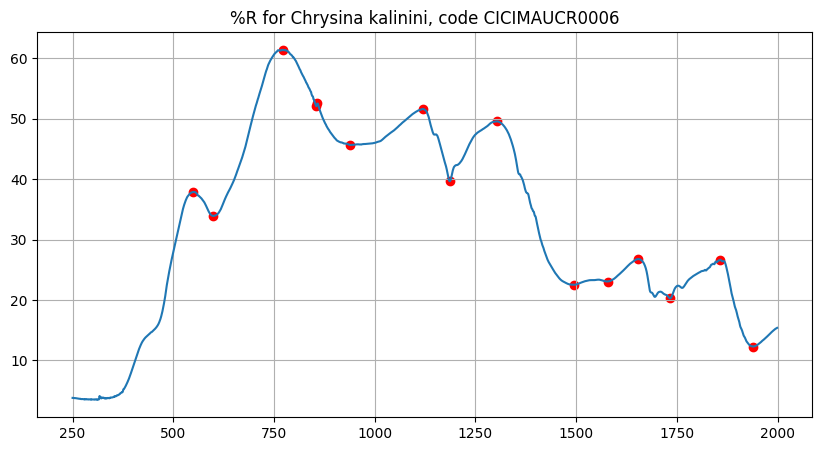

In [4]:
spectrum = training_spectra[4]

peaks = PeakList(spectrum)
peaks.plot()

In [5]:
obj = Critical_Points(spectrum).get_metric_value()
print(obj)
print(type(obj))

[[ 599.        855.        939.       1186.       1494.       1578.
  1733.       1940.        550.        772.        858.       1119.
  1303.       1654.       1858.      ]
 [  33.878252   52.039889   45.619933   39.642633   22.5114     23.0543
    20.2637     12.294767   37.871428   61.37373    52.492067   51.588067
    49.532067   26.7769     26.644867]]
<class 'numpy.ndarray'>


In [6]:
metric_list = [Gamma_Arbitrary_Limits, Gamma_First_Two_Peaks,Gamma_Area_Under_Curve_Naive,Gamma_Area_Under_Curve_First_Min_Cut, Gamma_Vector_Relative_Reflectance, 
               Wavelength_Vector, Critical_Points, Minimum_Points, Maximum_Points, Minimum_Points_Normalized,
               Maximum_Points_Normalized]
for metric_i in metric_list:
    gftp = metric_i(spectrum).get_metric_value()
    print(gftp)

1.0248502652342322
1.0248502652342322
1.6205813522532078
2.140540182188479
2.926099064895165
[1.         1.62058135 1.38605988 1.36218964 1.30790069 0.70704754
 0.70356119]
[ 550.  772.  858. 1119. 1303. 1654. 1858.]
[[ 599.        855.        939.       1186.       1494.       1578.
  1733.       1940.        550.        772.        858.       1119.
  1303.       1654.       1858.      ]
 [  33.878252   52.039889   45.619933   39.642633   22.5114     23.0543
    20.2637     12.294767   37.871428   61.37373    52.492067   51.588067
    49.532067   26.7769     26.644867]]
[[ 599.        855.        939.       1186.       1494.       1578.
  1733.       1940.      ]
 [  33.878252   52.039889   45.619933   39.642633   22.5114     23.0543
    20.2637     12.294767]]
[[ 550.        772.        858.       1119.       1303.       1654.
  1858.      ]
 [  37.871428   61.37373    52.492067   51.588067   49.532067   26.7769
    26.644867]]
[[5.99000000e+02 8.55000000e+02 9.39000000e+02 1.1860000